# Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Carregamento dos Dados

In [2]:
# Carregar o dataset enviado
df = pd.read_csv('https://viagens-ml.s3.sa-east-1.amazonaws.com/dataset_viagens_brasil.csv')

In [3]:
df.head()

,Idade,Cidade_Origem,Custo_Desejado,Prefere_Praia,Prefere_Natureza,Prefere_Cultura,Prefere_Festas,Prefere_Gastronomia,Prefere_Compras,Cidade_Destino
0,23.0,Campo Grande,9000.0,4,3.0,1,5.0,1.0,3,Porto Seguro
1,33.0,Rio Branco,NaN,4,5.0,3,5.0,5.0,5,Balneário Camboriú
2,46.0,Rio Branco,2900.0,5,4.0,5,4.0,2.0,2,Porto Seguro
3,20.0,São Luís,2900.0,5,3.0,4,3.0,5.0,4,Porto Seguro
4,37.0,Teresina,1700.0,3,3.0,4,2.0,1.0,1,Fernando de Noronha


In [4]:
# Tipos de Dados das Colunas
print(df.dtypes)

Idade                  float64
Cidade_Origem           object
Custo_Desejado         float64
Prefere_Praia           object
Prefere_Natureza       float64
Prefere_Cultura         object
Prefere_Festas         float64
Prefere_Gastronomia    float64
Prefere_Compras         object
Cidade_Destino          object
dtype: object


In [5]:
# Valores nulos por coluna
print(df.isnull().sum())

Idade                  497
Cidade_Origem            0
Custo_Desejado         497
Prefere_Praia            0
Prefere_Natureza       400
Prefere_Cultura          0
Prefere_Festas         400
Prefere_Gastronomia    400
Prefere_Compras          0
Cidade_Destino           0
dtype: int64


In [6]:
# Valores únicos por coluna
for col in df.columns:
    print(f"Valores únicos em '{col}':")
    print(df[col].unique())
    print("----")

Valores únicos em 'Idade':
[ 23.  33.  46.  20.  37.  53.  36.  43.  49.  24.  69.  58.  50.  57.
  56.  35. 190.  28.  45.  42.  67.  40.  48.  47.  59.  52.  nan  65.
  66.  19.  18.  29.  22.  54.  26.  41.  25.  55.  63.  21.  31.  38.
  34.  39.  62.  68.  44.  51.  64.  61.  70.  60.  30.  32.  27.]
----
Valores únicos em 'Cidade_Origem':
['Campo Grande' 'Rio Branco' 'São Luís' 'Teresina' 'João Pessoa' 'Maceió'
 'Recife' 'Vitória' 'Porto Velho' 'Aracaju' 'Goiânia' 'Porto Alegre'
 'Natal' 'Cuiabá' 'Fortaleza' 'Florianópolis' 'Belém' 'Brasília'
 'Boa Vista' 'Curitiba' 'Rio de Janeiro' 'Macapá' 'Manaus' 'São Paulo'
 'Palmas' 'Salvador' 'Belo Horizonte']
----
Valores únicos em 'Custo_Desejado':
[  9000.     nan   2900.   1700.   7100.   2200.   5200.   4400.   3500.
   3100.   9400.   5700.  10300.   2800.   4900.   2500.   9600.   5800.
   3400.  15200.   3200.   1300.   5100. 400000.   7000.   3000.  11000.
  11900.   2700.   3800.   4600.   5400.   6200.  12100.   4000.   5300.
  

# Tratamento dos Dados

## Tratamento de Valores Sabotados

### Tratamento de Valores Sabotados nas Colunas `Prefere_`

In [7]:
# Contagem de quantos 'erro' existem na coluna 'Prefere_Praia'
num_erros = df['Prefere_Praia'].value_counts().get('erro', 0)
print(f"Número de ocorrências de 'erro' em 'Prefere_Praia': {num_erros}")

Número de ocorrências de 'erro' em 'Prefere_Praia': 400


In [8]:
# Contagem de qauntos 'cinco' existem na coluna 'Prefere_Cultura'
num_cinco = df['Prefere_Cultura'].value_counts().get('cinco', 0)
print(f"Número de ocorrências de 'cinco' em 'Prefere_Cultura': {num_cinco}")

Número de ocorrências de 'cinco' em 'Prefere_Cultura': 400


In [9]:
# Gera a lista de colunas que começam com "Prefere_"
cols_prefere = [col for col in df.columns if col.startswith("Prefere_")]

for col in cols_prefere:
    print(f"\nFrequência em '{col}':")
    print(df[col].value_counts(dropna=False))  


Frequência em 'Prefere_Praia':
Prefere_Praia
5       3996
1       3930
2       3908
3       3888
4       3878
erro     400
Name: count, dtype: int64

Frequência em 'Prefere_Natureza':
Prefere_Natureza
5.0    3960
2.0    3937
1.0    3915
4.0    3908
3.0    3880
NaN     400
Name: count, dtype: int64

Frequência em 'Prefere_Cultura':
Prefere_Cultura
2        4016
5        3941
3        3889
1        3885
4        3869
cinco     400
Name: count, dtype: int64

Frequência em 'Prefere_Festas':
Prefere_Festas
4.0    3966
1.0    3945
3.0    3926
2.0    3892
5.0    3871
NaN     400
Name: count, dtype: int64

Frequência em 'Prefere_Gastronomia':
Prefere_Gastronomia
2.0    3981
1.0    3925
3.0    3913
5.0    3902
4.0    3879
NaN     400
Name: count, dtype: int64

Frequência em 'Prefere_Compras':
Prefere_Compras
2        4026
4        3944
5        3917
3        3876
1        3837
cinco     400
Name: count, dtype: int64


In [10]:
for col in cols_prefere:
    # substitui "cinco" por 5 e "erro" por NaN
    df[col] = df[col].replace({'cinco': '5', 'erro': np.nan})

    # Converte para numérico (garante que '1', '2'... virem inteiros)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Converte para inteiro
    df[col] = df[col].astype('Int32')
    
    # Mostra tipo final e valores únicos
    print(f"{col}: {df[col].dtype}, valores únicos: {df[col].unique()}")

Prefere_Praia: Int32, valores únicos: <IntegerArray>
[4, 5, 3, 2, 1, <NA>]
Length: 6, dtype: Int32
Prefere_Natureza: Int32, valores únicos: <IntegerArray>
[3, 5, 4, 1, 2, <NA>]
Length: 6, dtype: Int32
Prefere_Cultura: Int32, valores únicos: <IntegerArray>
[1, 3, 5, 4, 2]
Length: 5, dtype: Int32
Prefere_Festas: Int32, valores únicos: <IntegerArray>
[5, 4, 3, 2, 1, <NA>]
Length: 6, dtype: Int32
Prefere_Gastronomia: Int32, valores únicos: <IntegerArray>
[1, 5, 2, 4, 3, <NA>]
Length: 6, dtype: Int32
Prefere_Compras: Int32, valores únicos: <IntegerArray>
[3, 5, 2, 4, 1]
Length: 5, dtype: Int32


In [11]:
for col in cols_prefere:
    print(f"\nFrequência em '{col}':")
    print(df[col].value_counts(dropna=False))


Frequência em 'Prefere_Praia':
Prefere_Praia
5       3996
1       3930
2       3908
3       3888
4       3878
<NA>     400
Name: count, dtype: Int64

Frequência em 'Prefere_Natureza':
Prefere_Natureza
5       3960
2       3937
1       3915
4       3908
3       3880
<NA>     400
Name: count, dtype: Int64

Frequência em 'Prefere_Cultura':
Prefere_Cultura
5    4341
2    4016
3    3889
1    3885
4    3869
Name: count, dtype: Int64

Frequência em 'Prefere_Festas':
Prefere_Festas
4       3966
1       3945
3       3926
2       3892
5       3871
<NA>     400
Name: count, dtype: Int64

Frequência em 'Prefere_Gastronomia':
Prefere_Gastronomia
2       3981
1       3925
3       3913
5       3902
4       3879
<NA>     400
Name: count, dtype: Int64

Frequência em 'Prefere_Compras':
Prefere_Compras
5    4317
2    4026
4    3944
3    3876
1    3837
Name: count, dtype: Int64


## Tratamento de Outliers

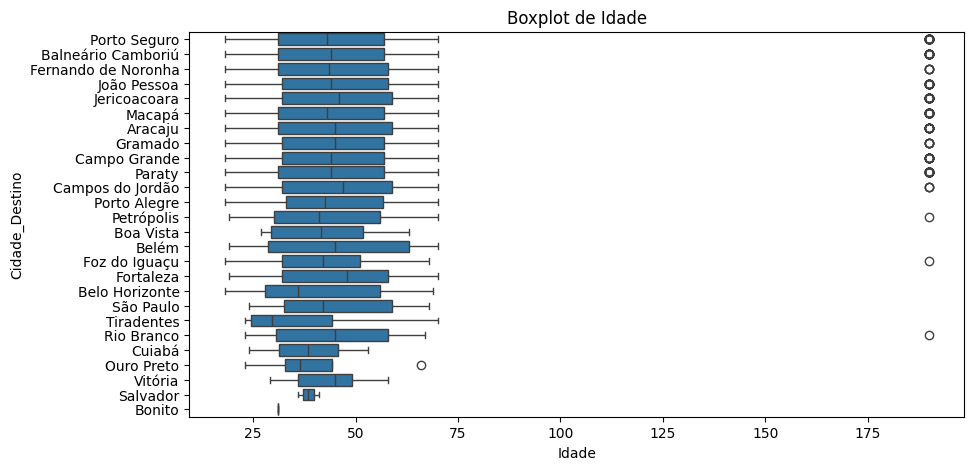

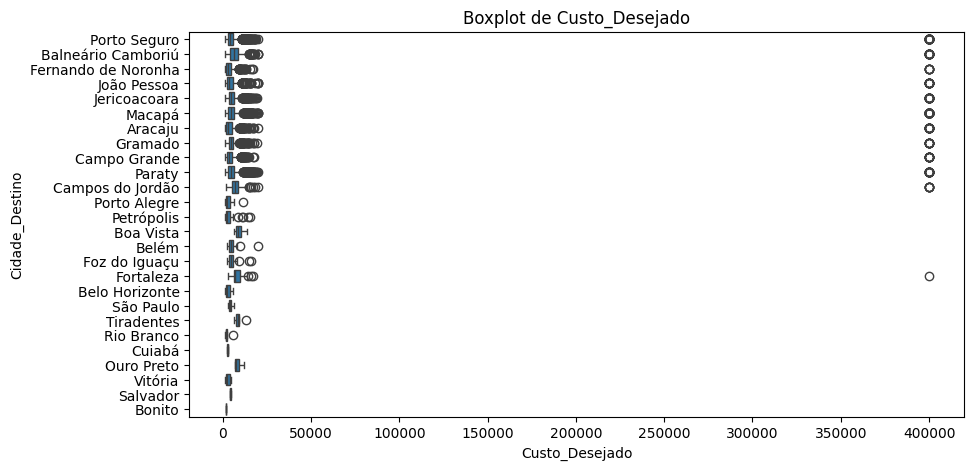

In [12]:
for col in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=df[col], y='Cidade_Destino')
    plt.title(f"Boxplot de {col}")
    plt.show()

In [13]:
# Contagem de valores nulos antes de tratamento de outliers
df.isnull().sum()

Idade                  497
Cidade_Origem            0
Custo_Desejado         497
Prefere_Praia          400
Prefere_Natureza       400
Prefere_Cultura          0
Prefere_Festas         400
Prefere_Gastronomia    400
Prefere_Compras          0
Cidade_Destino           0
dtype: int64

In [14]:
def handle_outliers_by_target(df, column, hard_lim_sup: float):
    # Cria uma dataframe vazio para concatenar os dados tratados
    outliers_filled = pd.DataFrame()

    for city in df['Cidade_Destino'].unique():
        # Filtra os dados da cidade com base no df base
        df_city_data = df[df['Cidade_Destino'] == city].copy()

        # Identifica os outliers com base no limite fornecido ou IQR
        outliers = df_city_data[df_city_data[column] > hard_lim_sup]

        # Remove os outliers do df da cidade
        df_city_data = df_city_data.drop(outliers.index)
    
        # Calcula a média da coluna para a cidade
        fill_value = int(df_city_data[column].mean())
    
        # Substitui os valores outliers pela média
        outliers.loc[:, column] = fill_value

        # Concatena os dados tratados
        outliers_filled = pd.concat([outliers_filled, outliers], axis=0)

        # Remove os outliers do df principal
        df = df.drop(outliers.index)
    
    # Adiciona de volta os registros tratados
    df = pd.concat([df, outliers_filled], axis=0).sort_index()

    # Retorna DataFrame atualizado
    return df   

### Aplicando o Tratamento de Outliers na Coluna `Idade`

In [15]:
df[df['Idade'] > 100][['Idade', 'Cidade_Destino']]

,Idade,Cidade_Destino
20,190.0,Balneário Camboriú
31,190.0,Porto Seguro
66,190.0,Jericoacoara
93,190.0,Campos do Jordão
168,190.0,Macapá
...,...,...
19677,190.0,Paraty
19700,190.0,Macapá
19712,190.0,Jericoacoara
19860,190.0,Porto Seguro


In [16]:
df = handle_outliers_by_target(df, 'Idade', hard_lim_sup=100)

In [17]:
df[df['Idade'] > 100][['Idade', 'Cidade_Destino']]

,Idade,Cidade_Destino


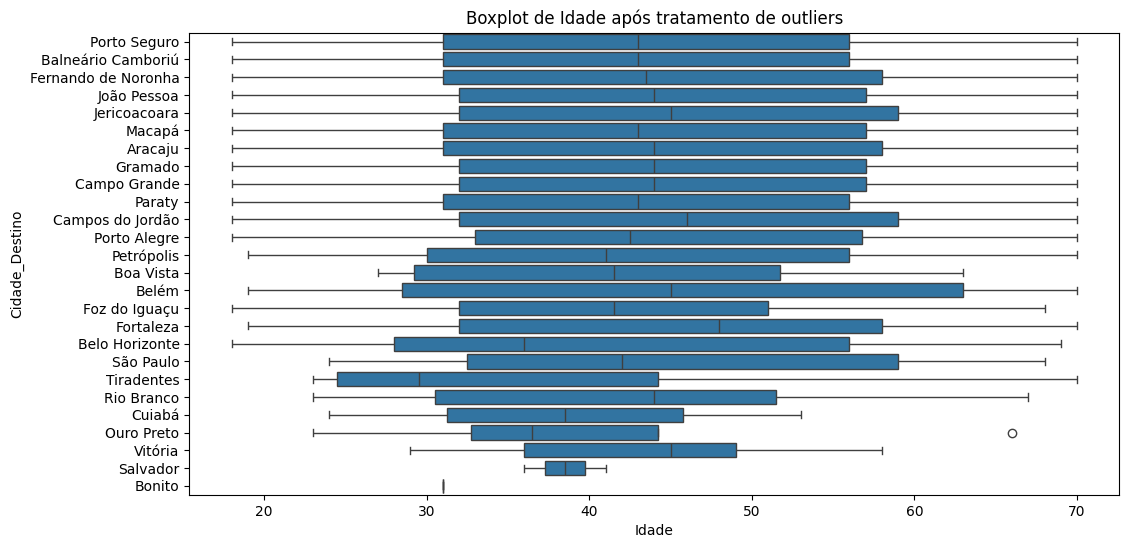

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Idade", y="Cidade_Destino")
plt.title("Boxplot de Idade após tratamento de outliers")
plt.show()

### Aplicando o Tratamento de Outliers na Coluna `Custo_Desejado`

In [19]:
df[df['Custo_Desejado'] > 50000][['Custo_Desejado', 'Cidade_Destino']]

,Custo_Desejado,Cidade_Destino
29,400000.0,João Pessoa
150,400000.0,Porto Seguro
247,400000.0,Macapá
377,400000.0,João Pessoa
488,400000.0,Jericoacoara
...,...,...
19636,400000.0,Macapá
19652,400000.0,Paraty
19866,400000.0,Jericoacoara
19916,400000.0,Porto Seguro


In [20]:
df = handle_outliers_by_target(df, 'Custo_Desejado', hard_lim_sup=50000)

In [21]:
df[df['Custo_Desejado'] > 50000][['Custo_Desejado', 'Cidade_Destino']]

,Custo_Desejado,Cidade_Destino


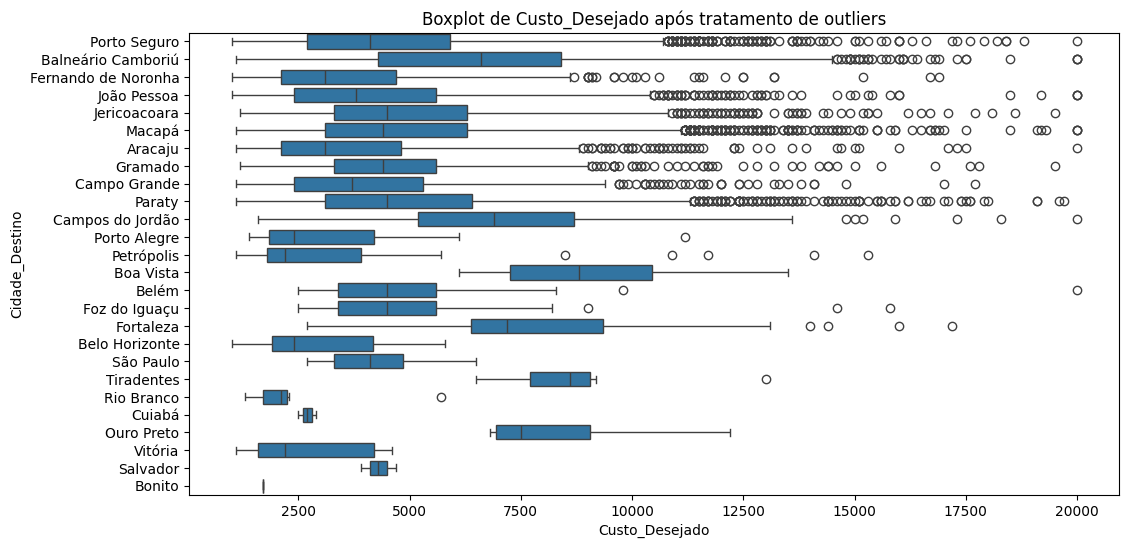

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Custo_Desejado", y="Cidade_Destino")
plt.title("Boxplot de Custo_Desejado após tratamento de outliers")
plt.show()

## Tratamento de Dados Nulos

In [23]:
# Contagem de valores nulos depois de tratamento de outliers
df.isnull().sum()

Idade                  497
Cidade_Origem            0
Custo_Desejado         497
Prefere_Praia          400
Prefere_Natureza       400
Prefere_Cultura          0
Prefere_Festas         400
Prefere_Gastronomia    400
Prefere_Compras          0
Cidade_Destino           0
dtype: int64

In [24]:
for col in cols_prefere:
    mais_frequente = df[col].mode().iloc[0]
    frequencia = df[col].value_counts().iloc[0]
    print(f"Coluna {col}: valor mais comum = {mais_frequente}, frequência = {frequencia}")

Coluna Prefere_Praia: valor mais comum = 5, frequência = 3996
Coluna Prefere_Natureza: valor mais comum = 5, frequência = 3960
Coluna Prefere_Cultura: valor mais comum = 5, frequência = 4341
Coluna Prefere_Festas: valor mais comum = 4, frequência = 3966
Coluna Prefere_Gastronomia: valor mais comum = 2, frequência = 3981
Coluna Prefere_Compras: valor mais comum = 5, frequência = 4317


In [25]:
def fillna_by_target(df, column, method='mean', default_value=5):
    # Filtra os registros com dados nulos na coluna especificada
    null_values = df[df[column].isnull()]

    # Cria um dataframe vazio para concatenar os dados tratados
    null_values_filled = pd.DataFrame()
    
    for city in df['Cidade_Destino'].unique():
        df_city_data = df[df['Cidade_Destino'] == city]

        # Calcula o valor de preenchimento
        if method == 'mean':
            mean_value = df_city_data[column].mean()
            fill_value = int(mean_value) if pd.notna(mean_value) else default_value

        elif method == 'mode':
            mode_series = df_city_data[column].mode()
            if not mode_series.empty and pd.notna(mode_series.iloc[0]):
                fill_value = mode_series.iloc[0]
            else:
                mean_value = df_city_data[column].mean()
                fill_value = int(mean_value) if pd.notna(mean_value) else default_value
        else:
            raise ValueError("method deve ser 'mean' ou 'mode'")

        # Filtra os registros nulos da cidade (faz uma cópia explícita)
        null_values_city_data = null_values[null_values['Cidade_Destino'] == city].copy()

        # Preenche os valores nulos
        null_values_city_data[column] = null_values_city_data[column].fillna(fill_value)

        # Concatena os dados tratados
        null_values_filled = pd.concat([null_values_filled, null_values_city_data], axis=0)

    # Remove os registros nulos originais
    df = df.drop(null_values.index, axis=0)

    # Adiciona os tratados e ordena
    df = pd.concat([df, null_values_filled], axis=0).sort_index()

    return df

In [26]:
df = fillna_by_target(df, 'Idade', 'mean')

In [27]:
df = fillna_by_target(df, 'Custo_Desejado', 'mean')

In [28]:
df = fillna_by_target(df, 'Prefere_Praia', 'mode')

In [29]:
df = fillna_by_target(df, 'Prefere_Natureza', 'mode')

In [30]:
df = fillna_by_target(df, 'Prefere_Festas', 'mode')

In [31]:
df = fillna_by_target(df, 'Prefere_Gastronomia', 'mode')

In [32]:
df = fillna_by_target(df, 'Prefere_Compras', 'mode')

In [33]:
df = fillna_by_target(df, 'Prefere_Cultura', 'mode')

In [34]:
for col in cols_prefere:
    print(f"\nFrequência em '{col}':")
    print(df[col].value_counts(dropna=False))


Frequência em 'Prefere_Praia':
Prefere_Praia
5    4251
1    3983
3    3944
2    3944
4    3878
Name: count, dtype: Int64

Frequência em 'Prefere_Natureza':
Prefere_Natureza
5    4079
1    4073
3    3961
4    3950
2    3937
Name: count, dtype: Int64

Frequência em 'Prefere_Cultura':
Prefere_Cultura
5    4341
2    4016
3    3889
1    3885
4    3869
Name: count, dtype: Int64

Frequência em 'Prefere_Festas':
Prefere_Festas
1    4142
5    4045
4    3970
3    3926
2    3917
Name: count, dtype: Int64

Frequência em 'Prefere_Gastronomia':
Prefere_Gastronomia
5    4107
1    4073
2    3981
4    3923
3    3916
Name: count, dtype: Int64

Frequência em 'Prefere_Compras':
Prefere_Compras
5    4317
2    4026
4    3944
3    3876
1    3837
Name: count, dtype: Int64


In [35]:
df.isnull().sum()

Idade                  0
Cidade_Origem          0
Custo_Desejado         0
Prefere_Praia          0
Prefere_Natureza       0
Prefere_Cultura        0
Prefere_Festas         0
Prefere_Gastronomia    0
Prefere_Compras        0
Cidade_Destino         0
dtype: int64

## Tratamento das Classes Alvo

In [36]:
df['Cidade_Destino'].value_counts()

Cidade_Destino
Macapá                 3910
Porto Seguro           3449
Paraty                 2945
Balneário Camboriú     1957
João Pessoa            1749
Jericoacoara           1661
Aracaju                1450
Campo Grande            982
Gramado                 620
Fernando de Noronha     479
Campos do Jordão        390
Foz do Iguaçu            90
Fortaleza                86
Petrópolis               61
Porto Alegre             43
Belém                    37
Belo Horizonte           26
Rio Branco               19
São Paulo                15
Boa Vista                11
Tiradentes                6
Vitória                   5
Ouro Preto                4
Cuiabá                    2
Salvador                  2
Bonito                    1
Name: count, dtype: int64

In [37]:
for city in df['Cidade_Destino'].unique():
    city_data = df[df['Cidade_Destino'] == city].copy()  
    rows = city_data.shape[0]
    if rows < 100:
        city_data.loc[:, 'Cidade_Destino'] = 'Outros Destino'
        df.drop(city_data.index, axis=0, inplace=True)
        df = pd.concat([df, city_data], axis=0)

In [38]:
df['Cidade_Destino'].value_counts()

Cidade_Destino
Macapá                 3910
Porto Seguro           3449
Paraty                 2945
Balneário Camboriú     1957
João Pessoa            1749
Jericoacoara           1661
Aracaju                1450
Campo Grande            982
Gramado                 620
Fernando de Noronha     479
Outros Destino          408
Campos do Jordão        390
Name: count, dtype: int64

## Balanceamento de Classes

In [39]:
from sklearn.utils import resample

# Separar a variável alvo
target = "Cidade_Destino"

# Dividir em classes
df_majority = df[df[target] == df[target].value_counts().idxmax()]  # classe majoritária
max_size = df[target].value_counts().max()

# DataFrame final balanceado
df_balanced = pd.DataFrame()

for classe, subset in df.groupby(target):
    # Repete as classes minoritárias até atingir a quantidade da classe majoritária
    df_upsampled = resample(
        subset,
        replace=True,           # permite repetição
        n_samples=max_size,     # iguala ao tamanho da classe majoritária
        random_state=42
    )
    df_balanced = pd.concat([df_balanced, df_upsampled])

# Embaralhar
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Distribuição após oversampling:")
print(df_balanced[target].value_counts())

Distribuição após oversampling:
Cidade_Destino
Macapá                 3910
Outros Destino         3910
João Pessoa            3910
Gramado                3910
Campos do Jordão       3910
Balneário Camboriú     3910
Jericoacoara           3910
Paraty                 3910
Fernando de Noronha    3910
Aracaju                3910
Campo Grande           3910
Porto Seguro           3910
Name: count, dtype: int64


## Label encoder

In [40]:
label_encoder = LabelEncoder()

df['Cidade_Destino'] = label_encoder.fit_transform(df['Cidade_Destino'])
cidades_originais = label_encoder.inverse_transform(df['Cidade_Destino'])